**Table of contents**<a id='toc0_'></a>    
- 1. [Plot synchronization stack    ](#toc1_)    
- 2. [Load results from synchronization analysis   ](#toc2_)    
- 3. [Aggregate figures  ](#toc3_)    
  - 3.1. [Synchronization vs perturbation ](#toc3_1_)    
  - 3.2. [Stats](#toc3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>Plot synchronization stack     [&#128285;](#toc0_)

In [2]:
# Imports
import pickle

import numpy as np
import matplotlib.pyplot as plt

# 2. <a id='toc2_'></a>Load results from synchronization analysis    [&#128285;](#toc0_)

In [3]:
n_datasets = 4

In [4]:
# Parameters
mag_min = 2.2  # the minimum magnitude of the considered earthquakes
dx = 10.  # in km, the along-strike bin size to compute the correlation length, the average number of felt earthquakes...
cc_thr = 0.07  # the correlation coefficient threshold to measure the correlation length

In [5]:
# Load Cascadia
filename = "casc_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

cascadia = pickle.load(open(path, "rb"))

casc_eq = cascadia['n_close_eq']
casc_cc_d = cascadia['corr_length']

Loading results/casc_synch_mc2.2_dx10_cc0.07.pkl


In [6]:
# Load Nankai
filename = "nank_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

nankai = pickle.load(open(path, "rb"))

nank_eq = nankai['n_close_eq']
nank_cc_d = nankai['corr_length']

Loading results/nank_synch_mc2.2_dx10_cc0.07.pkl


In [7]:
# Load Alaska
filename = "ak_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

alaska = pickle.load(open(path, "rb"))

ak_eq = alaska['n_close_eq']
ak_cc_d = alaska['corr_length']

Loading results/ak_synch_mc2.2_dx10_cc0.07.pkl


In [8]:
# Load New-Zealand
filename = "hiku_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

hikurangi = pickle.load(open(path, "rb"))

hiku_eq = hikurangi['n_close_eq']
hiku_cc_d = hikurangi['corr_length']

Loading results/hiku_synch_mc2.2_dx10_cc0.07.pkl


In [10]:
# Load simulation data
sim_num = 0
path = "simulations/np_osc_{:d}.pkl".format(sim_num)
print("Loading", path)

sim = pickle.load(open(path, "rb"))
sim_param = sim['parameters']
sim_results = sim['results']

sim_eq = sim_results['spatial_perturbation_yearly']
sim_cc_d = sim_results['corr_length']

Loading simulations/np_osc_0.pkl


# 3. <a id='toc3_'></a>Aggregate figures   [&#128285;](#toc0_)

## 3.1. <a id='toc3_1_'></a>Synchronization vs perturbation  [&#128285;](#toc0_)

In [11]:
dist_to_trm = 50

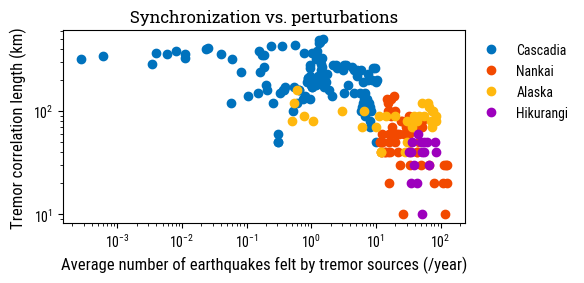

In [12]:
# Plot
fig, ax = plt.subplots(figsize=(6, 3))

ax.set_xlabel('Average number of earthquakes felt by tremor sources (/year)')
ax.set_ylabel('Tremor correlation length (km)')
ax.set_title('Synchronization vs. perturbations', fontname='Roboto Slab', fontsize=12)

ax.plot(casc_eq[dist_to_trm], casc_cc_d, 'o', label='Cascadia')
ax.plot(nank_eq[dist_to_trm], nank_cc_d, 'o', label='Nankai')
ax.plot(ak_eq[dist_to_trm], ak_cc_d, 'o', label='Alaska')
ax.plot(hiku_eq[dist_to_trm], hiku_cc_d, 'o', label='Hikurangi')
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(fontsize='small', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

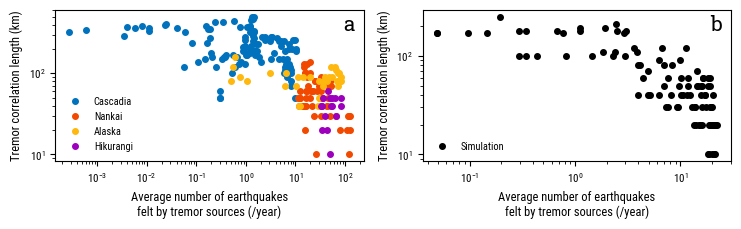

In [37]:
# Plot for paper
with plt.style.context('grl'):
    fig, axes = plt.subplots(1, 2, figsize=np.array([19, 6]) / 2.54)
    
    # --> Data
    ax = axes[0]
    ax.set_xlabel('Average number of earthquakes\nfelt by tremor sources (/year)')
    ax.set_ylabel('Tremor correlation length (km)')

    ax.plot(casc_eq[dist_to_trm], casc_cc_d, 'o', ms=4, label='Cascadia')
    ax.plot(nank_eq[dist_to_trm], nank_cc_d, 'o', ms=4, label='Nankai')
    ax.plot(ak_eq[dist_to_trm], ak_cc_d, 'o', ms=4, label='Alaska')
    ax.plot(hiku_eq[dist_to_trm], hiku_cc_d, 'o', ms=4, label='Hikurangi')

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.legend(fontsize='small', bbox_to_anchor=(0, 0), loc='lower left')

    ax.text(.97, .97, 'a', transform=ax.transAxes, fontsize=15, va='top', ha='right', fontname='Roboto Slab')

    # --> Simulation
    ax = axes[1]
    ax.set_xlabel('Average number of earthquakes\nfelt by tremor sources (/year)')
    ax.set_ylabel('Tremor correlation length (km)')

    ax.plot(sim_eq, sim_cc_d, 'o', c='k', ms=4, label='Simulation')

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.legend(fontsize='small', bbox_to_anchor=(0, 0), loc='lower left')

    ax.text(.97, .97, 'b', transform=ax.transAxes, fontsize=15, va='top', ha='right', fontname='Roboto Slab')

    plt.tight_layout()
    plt.savefig('figures/synch_vs_perturbations.pdf', dpi=400)
    plt.savefig('figures/synch_vs_perturbations.png', dpi=400)
    plt.show()

## 3.2. <a id='toc3_2_'></a>Stats [&#128285;](#toc0_)

In [38]:
dist_to_trm = 50

In [39]:
# # Compute slope, correlation coeff and significance of the linear regression (Linear fit)
# from scipy.stats import linregress

# # --> Cascadia
# no_nan = ~np.isnan(casc_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
# slope_casc, intercept_casc, r_value_casc, p_value_casc, std_err_casc = linregress(casc_eq[dist_to_trm][no_nan], casc_cc_d[no_nan])

# SSres = np.sum((casc_cc_d[no_nan] - (slope_casc * casc_eq[dist_to_trm][no_nan] + intercept_casc))**2)  # sum of squares of residuals
# SStot = np.sum((casc_cc_d[no_nan] - np.mean(casc_cc_d[no_nan]))**2)  # total sum of squares
# r2_casc = 1 - SSres / SStot

# # --> Nankai
# no_nan = ~np.isnan(nank_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
# slope_nank, intercept_nank, r_value_nank, p_value_nank, std_err_nank = linregress(nank_eq[dist_to_trm][no_nan], nank_cc_d[no_nan])

# SSres = np.sum((nank_cc_d[no_nan] - (slope_nank * nank_eq[dist_to_trm][no_nan] + intercept_nank))**2)  # sum of squares of residuals
# SStot = np.sum((nank_cc_d[no_nan] - np.mean(nank_cc_d[no_nan]))**2)  # total sum of squares
# r2_nank = 1 - SSres / SStot

# # --> Alaska
# no_nan = ~np.isnan(ak_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
# slope_ak, intercept_ak, r_value_ak, p_value_ak, std_err_ak = linregress(ak_eq[dist_to_trm][no_nan], ak_cc_d[no_nan])

# SSres = np.sum((ak_cc_d[no_nan] - (slope_ak * ak_eq[dist_to_trm][no_nan] + intercept_ak))**2)  # sum of squares of residuals
# SStot = np.sum((ak_cc_d[no_nan] - np.mean(ak_cc_d[no_nan]))**2)  # total sum of squares
# r2_ak = 1 - SSres / SStot

In [37]:
# Compute slope, correlation coeff and significance of the linear regression (Log fit)
from scipy.stats import linregress

# --> Cascadia
no_nan = ~np.isnan(casc_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
no_0 = (casc_eq[dist_to_trm] > 0) & (casc_cc_d > 0)

casc_eq_log = np.log10(casc_eq[dist_to_trm][no_nan & no_0])
casc_cc_d_log = np.log10(casc_cc_d[no_nan & no_0])

slope_casc, intercept_casc, r_value_casc, p_value_casc, std_err_casc = linregress(casc_eq_log, casc_cc_d_log)

SSres = np.sum((casc_cc_d_log - (slope_casc * casc_eq_log + intercept_casc))**2)  # sum of squares of residuals
SStot = np.sum((casc_cc_d_log - np.mean(casc_cc_d_log))**2)  # total sum of squares
r2_casc = 1 - SSres / SStot

# --> Cascadia where there are earthquakes
where_eq = (casc_eq[dist_to_trm] > 1.)

casc_eq_log = np.log10(casc_eq[dist_to_trm][no_nan & no_0 & where_eq])
casc_cc_d_log = np.log10(casc_cc_d[no_nan & no_0 & where_eq])

slope_casc_eq, intercept_casc_eq, r_value_casc_eq, p_value_casc_eq, std_err_casc_eq = linregress(casc_eq_log, casc_cc_d_log)

SSres = np.sum((casc_cc_d_log - (slope_casc_eq * casc_eq_log + intercept_casc_eq))**2)  # sum of squares of residuals
SStot = np.sum((casc_cc_d_log - np.mean(casc_cc_d_log))**2)  # total sum of squares
r2_casc_eq = 1 - SSres / SStot

# --> Nankai
no_nan = ~np.isnan(nank_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
no_0 = (nank_eq[dist_to_trm] > 0) & (nank_cc_d > 0)

nank_eq_log = np.log10(nank_eq[dist_to_trm][no_nan & no_0])
nank_cc_d_log = np.log10(nank_cc_d[no_nan & no_0])

slope_nank, intercept_nank, r_value_nank, p_value_nank, std_err_nank = linregress(nank_eq_log, nank_cc_d_log)

SSres = np.sum((nank_cc_d_log - (slope_nank * nank_eq_log + intercept_nank))**2)  # sum of squares of residuals
SStot = np.sum((nank_cc_d_log - np.mean(nank_cc_d_log))**2)  # total sum of squares
r2_nank = 1 - SSres / SStot

# --> Alaska
no_nan = ~np.isnan(ak_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
no_0 = (ak_eq[dist_to_trm] > 0) & (ak_cc_d > 0)

ak_eq_log = np.log10(ak_eq[dist_to_trm][no_nan & no_0])
ak_cc_d_log = np.log10(ak_cc_d[no_nan & no_0])

slope_ak, intercept_ak, r_value_ak, p_value_ak, std_err_ak = linregress(ak_eq_log, ak_cc_d_log)

SSres = np.sum((ak_cc_d_log - (slope_ak * ak_eq_log + intercept_ak))**2)  # sum of squares of residuals
SStot = np.sum((ak_cc_d_log - np.mean(ak_cc_d_log))**2)  # total sum of squares
r2_ak = 1 - SSres / SStot

# --> Hikurangi
no_nan = ~np.isnan(hiku_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
no_0 = (hiku_eq[dist_to_trm] > 0) & (hiku_cc_d > 0)

hiku_eq_log = np.log10(hiku_eq[dist_to_trm][no_nan & no_0])
hiku_cc_d_log = np.log10(hiku_cc_d[no_nan & no_0])

slope_hiku, intercept_hiku, r_value_hiku, p_value_hiku, std_err_hiku = linregress(hiku_eq_log, hiku_cc_d_log)

SSres = np.sum((hiku_cc_d_log - (slope_hiku * hiku_eq_log + intercept_hiku))**2)  # sum of squares of residuals
SStot = np.sum((hiku_cc_d_log - np.mean(hiku_cc_d_log))**2)  # total sum of squares
r2_hiku = 1 - SSres / SStot

/var/folders/_0/w1st1dg91_l80my3nlzkvb_w0000gn/T/ipykernel_15492/785850118.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])


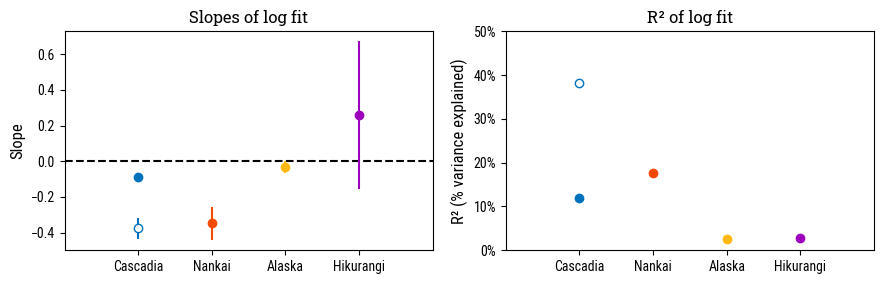

In [38]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
for a in ax:
    a.set_xlim(0, n_datasets + 1)
    a.set_xticks(np.arange(1, n_datasets + 1))
    a.set_xticklabels(['Cascadia', 'Nankai', 'Alaska', 'Hikurangi'])


ax[0].set_title('Slopes of log fit', fontname='Roboto Slab', fontsize=12)
ax[0].set_ylabel('Slope')


ax[0].axhline(0, color='black', ls='--')
ax[0].errorbar(1, slope_casc, yerr=std_err_casc, fmt='o', c='C0', label='Cascadia')
ax[0].errorbar(1, slope_casc_eq, yerr=std_err_casc_eq, fmt='o', mfc='w', mec='C0', label='Cascadia (> 1 M2.0 eq/year)')
ax[0].errorbar(2, slope_nank, yerr=std_err_nank, fmt='o', label='Nankai')
ax[0].errorbar(3, slope_ak, yerr=std_err_ak, fmt='o', label='Alaska')
ax[0].errorbar(4, slope_hiku, yerr=std_err_hiku, fmt='o', label='Hikurangi')

ax[1].set_title('R² of log fit', fontname='Roboto Slab', fontsize=12)
ax[1].set_ylabel('R² (% variance explained)')

ax[1].set_ylim(0, .5)
vals = ax[1].get_yticks()
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax[1].plot(1, r2_casc, 'o', c='C0', label='Cascadia')
ax[1].plot(1, r2_casc_eq, 'o', mfc='w', mec='C0', label='Cascadia (> 1 M2.0 eq/year)')
ax[1].plot(2, r2_nank, 'o', label='Nankai')
ax[1].plot(3, r2_ak, 'o', label='Alaska')
ax[1].plot(4, r2_hiku, 'o', label='Hikurangi')

plt.tight_layout()
plt.show()